In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

C:\Users\Daria\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_csv('email.csv').dropna(subset= ['content'])

C:\Users\Daria\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['tokens'] = df.one_line.apply(lambda x: str(x).split(" "))

In [4]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [5]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(list(df.tokens))]

In [6]:
model_doc2vec= Doc2Vec.load("d2v-5.model")

In [7]:
model_doc2vec.docvecs[0]

array([-2.5894747 , -0.6310076 ,  0.00903296, -0.3139348 ,  1.3027536 ],
      dtype=float32)

In [8]:
X_docs = np.array([model_doc2vec.docvecs[i] for i in range(len(df))])

In [9]:
pca_docs = PCA(n_components=2)
result_docs = pca_docs.fit_transform(X_docs)

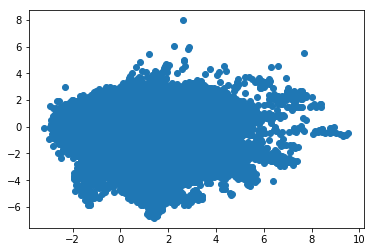

In [10]:
plt.scatter(result_docs[:,0], result_docs[:,1])

In [11]:
to_cluster = 20_000
idx = np.random.randint(X_docs.shape[0], size=to_cluster)
X_cluster = X_docs[idx,:]

In [12]:
result_docs_cluster = pca_docs.transform(X_cluster)

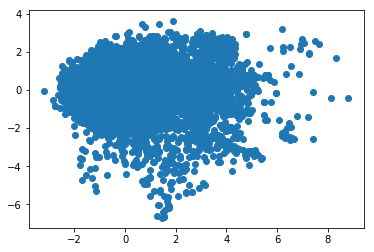

In [13]:
plt.scatter(result_docs_cluster[:,0], result_docs_cluster[:,1])

In [14]:
from sklearn.cluster import DBSCAN, KMeans

In [15]:
kmeans = KMeans(20)
y = kmeans.fit_predict(X_cluster)

In [16]:
df.iloc[0]

Unnamed: 0                                                      0
Unnamed: 0.1                                               187499
Message-ID          <20783914.1075846932191.JavaMail.evans@thyme>
Date                                          2000-03-03 09:47:00
From                       frozenset({'leslie.hansen@enron.com'})
To                            frozenset({'tana.jones@enron.com'})
Subject                                \tEOL Credit Responses 3/2
X-From                                              Leslie Hansen
X-To                                                   Tana Jones
X-cc                                                          NaN
X-bcc                                                         NaN
X-Folder         \Tanya_Jones_Dec2000\Notes Folders\All documents
X-Origin                                                  JONES-T
X-FileName                                             tjones.nsf
content         RLacy, Inc. is not authorized to trade US powe...
user      

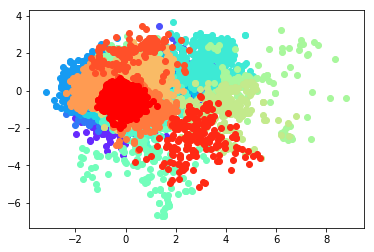

In [17]:
from matplotlib.pyplot import cm
color=iter(cm.rainbow(np.linspace(0,1,20)))
for i in range(20):
    c = next(color)
    plt.scatter(result_docs_cluster[y == i][:,0], result_docs_cluster[y == i][:,1], color=c)

In [18]:
from scipy.spatial import distance

idx_centers = []
i_doc_mins = []
doc_coords_mins = []
idx_externs = []
i_doc_maxs = []
doc_coords_maxs = []
for i, center in enumerate(kmeans.cluster_centers_):
    docs_in_cluster = X_cluster[y == i]
    i_docs_in_cluster = idx[y == i]
    min_dist = 9_999_999_999
    doc_coords_min = 0
    i_min_dist = -1
    i_doc_min = -1
    max_dist = 0
    doc_coords_max = 0
    i_max_dist = -1
    i_doc_max = -1
    for i_doc, doc in enumerate(docs_in_cluster):
        curr_dist = np.linalg.norm(doc-center, ord=5)
#         curr_dist = distance.euclidean(doc, center)
        if (curr_dist > max_dist):
            max_dist = curr_dist
            i_max_dist = i_docs_in_cluster[i_doc]
            i_doc_max = i_doc
            doc_coords_max = doc
        if (curr_dist < min_dist):
            min_dist = curr_dist
            i_min_dist = i_docs_in_cluster[i_doc]
            i_doc_min = i_doc
            doc_coords_min = doc
    idx_centers.append(i_docs_in_cluster[i_doc_min])
    i_doc_mins.append(i_doc_min)    
    doc_coords_mins.append(doc_coords_min)
    idx_externs.append(i_docs_in_cluster[i_doc_max])
    i_doc_maxs.append(i_doc_max)
    doc_coords_maxs.append(doc_coords_max)

In [19]:
X_cluster.shape

(20000, 5)

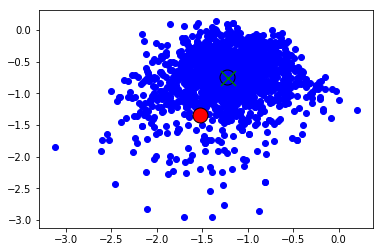

In [20]:
color=iter(cm.rainbow(np.linspace(0,1,20)))
i = 0
c = next(color)
plt.scatter(X_cluster[y == i][:,0], X_cluster[y == i][:,1], color='blue')
center_id = i_doc_mins[i]
extern_id = i_doc_maxs[i]
plt.scatter(doc_coords_mins[i][0], doc_coords_mins[i][1], color='blue', marker='o', edgecolors='black', s=15**2)
plt.scatter(doc_coords_maxs[i][0], doc_coords_maxs[i][1], color='red', marker='o', edgecolors='black', s=15**2)
plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], color='green', marker='x', edgecolors='black', s=15**2)

In [21]:
for i in range(20):
    print("\n\nCluster {0}:\n".format(i))
    idx_center = documents[idx_centers[i]]
    idx_extern = documents[idx_externs[i]]
    print(" Center: ")
    print (" ".join(idx_center[0]))
    print()
    print(" Extern: ")
    print (" ".join(idx_extern[0]))
    print('\n')



Cluster 0:

 Center: 
There is an interconnect between WIC and FUGG for The WIC ties to the statement Can you please check the FUGG Right now I have some extra time I would love to help you guys with this imbalance Could I take a look at Please let me know Thanks Gloria

 Extern: 
I just added APB for the broker Kerri Thompson ENRON PM To Kate ECT cc Subject apb missing deal for chris buy duke mw off peak




Cluster 1:

 Center: 
IMAGE Yahoo sent this email to you because your Yahoo Account Information indicated that you wish to receive special offers If you do not want receive further mailings from Yahoo Delivers unsubscribe now by here You are subscribed at pallen Yahoo May Greetings Here a look at some of the things happening on Yahoo in May New Features Services IMAGE Find Last Minute Mother Day Gifts Do panic if you have found perfect gift for Mom Visit the Last Minute Mother Day Gift Center Yahoo Shopping You find outstanding merchants and guaranteed delivery time for Mom spec

In [22]:
sum(y == 1)

1070

In [23]:
for i in range(20):
    print("\n\nCluster {0}:\n".format(i))
    docs_i = np.array(documents)[idx,:][y == i]
    for k in range(min(sum(y == i), 10)):
        print (" ".join(docs_i[k][0]))
        print('\n')



Cluster 0:

Attached is the revised customer account list for the long term marketers Michelle Christine Jeff and I took a first shot at accounts to incorporate Michelle If anyone has any questions please let me know


Robert Michaels is proposing a consultant study looking at the California electricity chaos see attached It is roughly a study before printing and distribution costs with a delivery date of December The study would also involve Ken Malloy Center for the Advancement of Energy Markets I think Robert would do a good job but raise these issues This is expensive It is at consultant rates and is not an academic study where a think tank can get the professors to do something at less cost Malloy is pretty heavy into this at a cost of of about of Michaels His NARUC connections are very important and we would want him on the popularization side but this is too much The study might need a with lots of academic credibility to join Robert as good as he is I glad that we have this p

Tracy In response to your of December you are correct there should be two separate agreements between ENA and ECC Debra Perlingiere Enron North America Legal Department Smith Street EB Houston Texas dperlin Phone Fax


Audrey Here are our bullets for the week Thanks Kim


thanks Andy Zipper ENRON AM To John ECT cc Subject Adam Resources FYI


Robin Attached is the final version of the Master Agreement If in agreement please have two originals signed and return same to my attention Upon final execution I will forward an original for your records Do not hesitate to give me call should you have any additional questions or comments regarding the enclosed Best regards Debra Perlingiere Enron North America Legal Smith Street EB Houston Texas Fax


Russ Please add Jim Armogida to the distribution for the note Thanks Sara Sara Shackleton Enron Wholesale Services Smith Street Houston TX Ph Fax


Stephanie Please send the boilerplate ISDA Master Agreement and Credit Support Annex to Gregg Penman

We need to discuss further internally but they may be correct in their assessment Best Jeff Tom Bentley Company Exchange PM To Jeff Enron cc Mike D EES Douglas EES Subject issue SB From further discussions with it appears their primary concern relative to Enron decision to their accounts is that they have lost their direct access status and are again a bundled utility customer Jeff what impacts does this status have with respect to the ban language of And with will they now encumber costs to become a direct access customer that they would not have been liable for had Enron not made the decision to return them to utility supply Your input is appreciated Please shed some light here as soon as possible Regards Tom Riley


Right when we start we will be keeping total var between and It should be mostly gas though because we wo have our power marketers liscense yet


California Wary of Dynegy Bid to Buy Out Enron Energy Both companies are prominent players in the state power market The move

ISDA PRESS REPORT OCTOBER CREDIT DERIVATIVES ISDA clears way for Railtrack convertible delivery IFR TRADING PRACTICE Investment banks offer derivatives services to clients Financial Times WEATHER DERIVATIVES Every cloud FOW ISDA clears way for Railtrack convertible delivery IFR October A UK lawyer retained by the International Swaps and Derivatives Association last Thursday advised that convertible bonds in their normal form meet the clause of ISDA standard credit derivatives definitions This cleared the way for banks to accept delivery of Railtrack convertible under existing default swaps Around of convertibles had been delivered under default swap exercises by the close of trading on Friday Although banks and other protection sellers will now realise some losses on acceptance of the Railtrack convertible compared with accepting Railtrack straight debt the advice from Robin Potts QC was welcomed by the heads of credit derivatives at the major dealers The legal opinion in effect remove

Start Date HourAhead hour HourAhead schedule download failed Manual intervention required LOG MESSAGES PARSING FILE Final Error Can not perform this operation on a closed database Unknown database Alias Unknown database Alias Unknown database Alias Error Can not perform this operation on a closed database Unknown database Alias Unknown database Alias Unknown database Alias Error Can not perform this operation on a closed database Unknown database Alias Unknown database Alias Error Can not perform this operation on a closed database Error Can not perform this operation on a closed database Error Can not perform this operation on a closed database Unknown database Alias Unknown database Alias Unknown database Alias Unknown database Alias Unknown database Alias Unknown database Alias Unknown database Alias Error Can not perform this operation on a closed database


Start Date HourAhead hour HourAhead schedule download failed Manual intervention required LOG MESSAGES PARSING FILE Final Err

What Worse Than A Pyromaniac In A Blazer A barber in a Seville A seamstress in a Dart An insurance adjuster in an Acclaim A construction worker in a Bobcat A creature in a black Laguna A theater manager in a Marquis An astronomer in an Eclipse An exterminator in a Beetle A in an Escort A spiritualist in an Aurora A proctologist in a Probe A proctologist in a Ram An orator in a Civic A country singer in a Neon A reporter in a A Good Humor man in a An orchestra conductor in a Prelude A classical musician in a Sonata A customs inspector in a Passport A dog trainer in a Rover A jeweler in a Topaz A band leader in a Tempo A gentleman in a Gallant A Bullfighter in a Matador A in a Barracuda An electrician in a Charger A snake handler in a Viper A man in a Prowler A car thief in a Jimmy A lepidopterist in a Monarch Barbie in a Malibu Sgt Preston in a Yukon Queen Elizabeth in a Regal Prince Rainier in a Monaco Princess Stephanie in a Riviera Prince Charles in a Regency Joan Collins in a Dynast

IMAGE Battle your friends for glory in Planters Crunch Time the otball game played via Featuring graphic action ters Crunch Time is fast fun and FREE Kickoff Now Remember the NFL ll of Famer Superbowl Champs and your favorite Teams or Players Save off NFL Memorabilia Enter coupon code at checkout o receive this exclusive offer Ends Attention Fantasy Fans bscribe to The Sporting News now for a low per issue AND get a FREE tainless Steel HURRY Brought to you by Sponsorship You are receiving these because you have signed up for CBS Fantasy Football To customize reschedule or turn off these ports please click here Player Updates NFL Reports IMAGE Latest NFL layer News Ricky Watters RB SEA The Wounded Ducks Updated ording to the Tacoma News Tribune Seahawks Head Coach Mike Holmgren says hat Watters will return to the starting lineup as soon as he healthy ch could be another month or longer We cross that bridge when we come to it Holmgren said I would be surprised if I did insert Ricky back 